<a href="https://colab.research.google.com/github/javadvahid/ML-course/blob/main/ML_course_project8_1_Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  K-means Clustering

# خوشه بندی 

در این پروژه ما ابتدا خوشه بندی را برروی داده های دو بعدی انجام می دهیم

سپس از خوشه بندی برای فشرده سازی تصاویر استفاده میکنیم

In [2]:
#load data set
#لود کردن داده های موجود
# در اولین مرحله فایل مربوط به دیتای بخش اول را آپلود کنید
#import numpy
import numpy as np
from scipy.io import loadmat


 
#داده ها را از فایل مشخص شده بخوانید
data1 = loadmat("/content/project8data1.mat")

#show a summary of data
#نمایش خلاصه ای از داده ها
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
print(data1["X"].shape)

(50, 2)


In [5]:
#split the data into input X
#داده ها ی ورودی و خروجی را در دو متغیر جدا میریزیم
#input features
X = data1["X"]


#find m
m = X.shape[0]
print(m)

50


# Data Visualization:

# نمایش داده ها

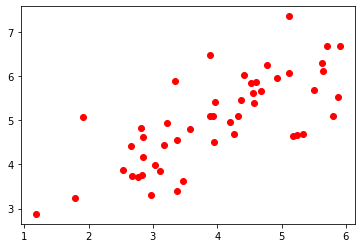

In [6]:
import matplotlib.pyplot as plt
plt.plot(X[:,0], X[:,1], 'ro')

# K-means Algorithm

<p align="center" width="100%">
    <img width="100%" src="https://drive.google.com/uc?id=1oLL9EvuVwpkKkkK8rHJaY8F6GpA_u_VQ">
</p>

In [7]:
#initialize K centroids (K=3)
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [8]:
#create function for finding the closes centroid to each data
def findClosestCentroid(X, centroids): 
  m = X.shape[0]

  K = centroids.shape[0]
  
  idx = np.zeros(m, dtype=int)
  #print(m)
  for i in range(m): 
    distance_array = np.sqrt(np.sum(np.square(X[i] - centroids), axis=1))
    idx[i] = np.argmin(distance_array)
  return idx

In [9]:
#test the function
idx = findClosestCentroid(X, initial_centroids)
print(idx)

[0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 2 0 0 2 0 2 0 2 0 0 0 2 2 0 0 0 2 0 2 0 2 0
 2 0 0 0 0 0 0 0 0 0 0 0 2]


In [10]:
def computeCentroids(X, idx, K):
  m, n = X.shape
  centroids = np.zeros((K, n))

  for k in range(K):
    centroids[k] = np.mean(X[idx == k], axis=0)
    #centroid[0] = np.mean(X[idx == 0], axis=0)
  return centroids
    

In [11]:
X.shape

(50, 2)

In [12]:
centroids = computeCentroids(X, idx, K=3)

In [13]:
print(centroids)

[[3.48343653 4.67666952]
 [5.24408518 4.66148767]
 [5.44433562 6.03683605]]


In [15]:
initial_centroids

array([[3, 3],
       [6, 2],
       [8, 5]])

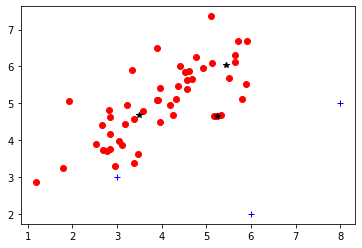

In [16]:
plt.plot(X[:,0], X[:,1], 'ro')#plot data
plt.plot(centroids[:,0], centroids[:,1], 'k*')#plot new centroid
plt.plot(initial_centroids[:,0], initial_centroids[:,1], 'b+')#plot initial centroid


In [17]:
#K-means algorithm function
def K_means(X, centroids_, K, max_iter, findClosestCentroid, computeCentroids):
  plt.figure()
  plt.plot(X[:,0], X[:,1], 'ro')
  for i in range(max_iter):
    idx = findClosestCentroid(X, centroids_)
    centroids_ = computeCentroids(X, idx, K)
    
    plt.figure()
    plt.plot(centroids_[:,0], centroids_[:,1], 'k*')

    cluster0_idx = (idx == 0)
    cluster1_idx = (idx == 1)
    cluster2_idx = (idx == 2)
    #print(cluster1_idx)
    #print(i)
    plt.plot(X[cluster0_idx, 0], X[cluster0_idx, 1], 'bo')
    plt.plot(X[cluster1_idx, 0], X[cluster1_idx, 1], 'ro')
    plt.plot(X[cluster2_idx, 0], X[cluster2_idx, 1], 'go')
    plt.title(str(i))

    

  return idx, centroids_

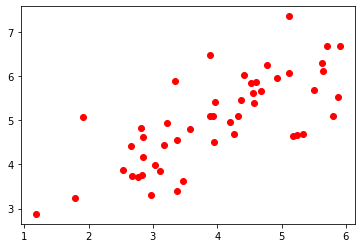

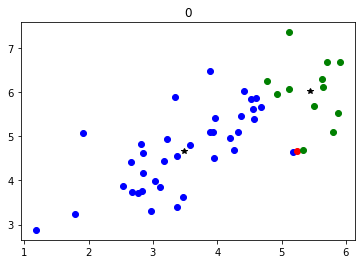

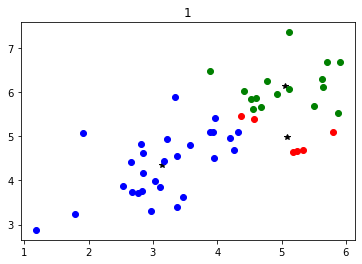

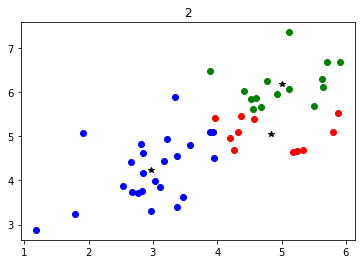

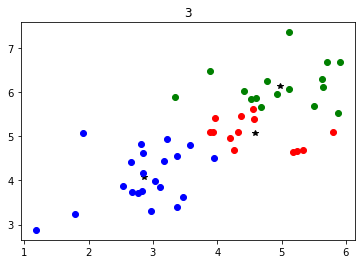

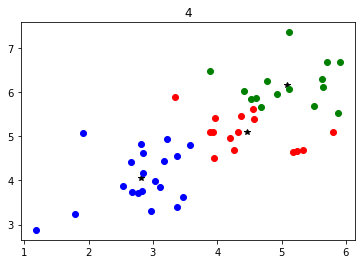

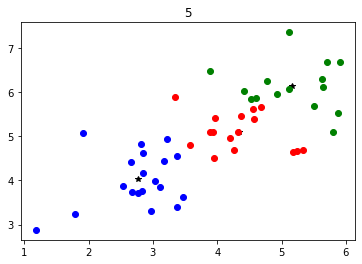

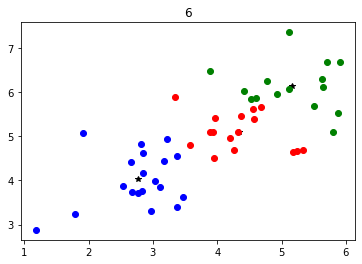

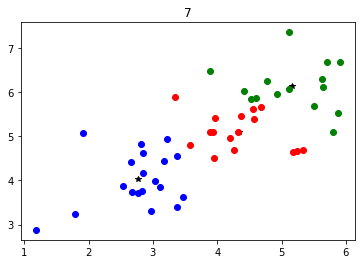

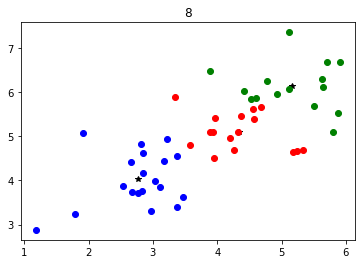

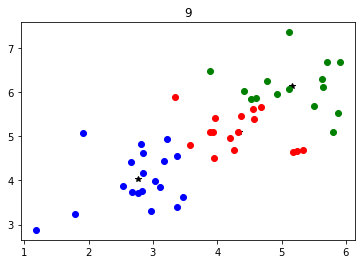

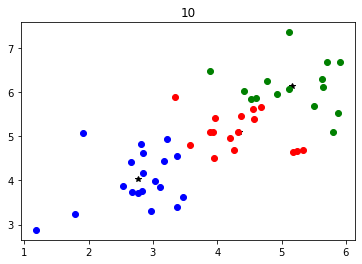

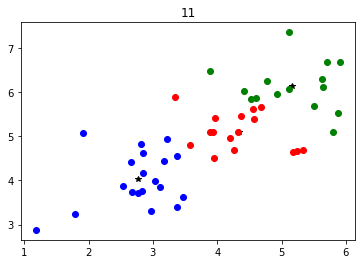

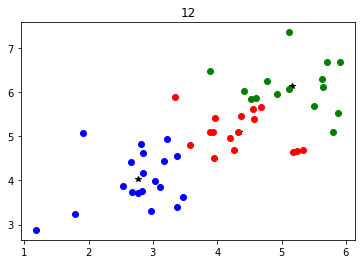

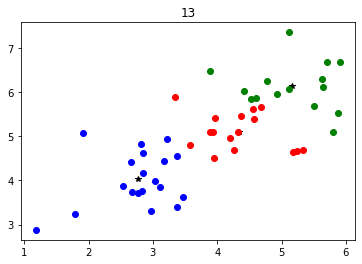

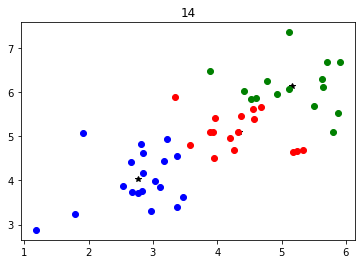

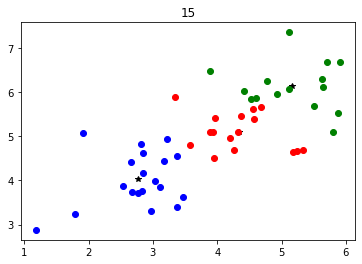

In [18]:
max_iter = 16
K = 3 
centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx, centroids = K_means(X, centroids, K, max_iter, findClosestCentroid, computeCentroids)



In [ ]:
print(centroids)

# Random Initialization

# راه اندازی تصادفی مرکز ها

<p align="center" width="100%">
    <img width="100%" src="https://drive.google.com/uc?id=158BGnW9XDwcguA7XODaP_5zzdqhHmcLK">
</p>

In [19]:
#create a function to choose random initial centroids
def randomCentroids(X, K):
  m, n = X.shape
  centroids = np.zeros((K, n))

  rand_idx = np.random.permutation(m)
  print(rand_idx)
  centroids = X[rand_idx[0:K], :]
  print(centroids)
  return centroids

In [21]:
randcentroid = randomCentroids(X, K=3)
#print(randcentroid)

[21 18 36  9 31 47 20  2 19 35 46 28 24 27  6 34 14 41 48  3 12 49 17 43
  0 25 15 33 45  8 40 44 30 29 10 26 38  4 39 23  7 37  5 13 11  1 42 32
 16 22]
[[3.57968458 4.80278074]
 [5.1101573  7.36319662]
 [2.6757463  3.73096988]]


In [ ]:
#exercise on project8data2.mat dataset
#load data and ...

#**Image compression using K-means algorithm:**

In [22]:
#first read image 
import matplotlib as mpl
import matplotlib.pyplot as plt

image = mpl.image.imread('/content/elonmusk.jpg')

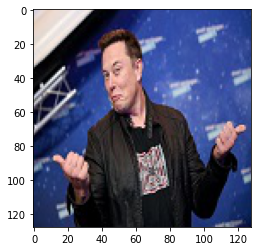

In [23]:
plt.imshow(image)

image size = 128 * 128 * 3 * 8 bits = 393216 bits

In [ ]:
#R 8bit 0-255
#G 8bit 0-255
#B 8bit 0-255

In [24]:
image = image/255
image.shape

(128, 128, 3)

In [25]:
image[0,0,:]

array([0.83137255, 0.81568627, 0.8745098 ])

In [26]:
#(128*128, 3)
img = image.reshape(-1, 3)

In [27]:
img.shape

(16384, 3)

In [ ]:
img[0,:]

In [ ]:
img[0,:]

In [28]:
#K-means algorithm function
def K_means_all(X, centroids, K, max_iter, findClosestCentroid, computeCentroids):
  for i in range(max_iter):
    idx = findClosestCentroid(X, centroids)
    centroids = computeCentroids(X, idx, K)
  return idx, centroids  

[16174   943  1650 ...  6992 12743 12210]
[[0.         0.         0.00784314]
 [0.08627451 0.09411765 0.28235294]
 [0.19215686 0.2745098  0.6       ]
 [0.         0.05098039 0.05098039]]


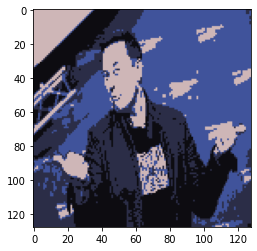

In [30]:
# K : define number of colors 
K=4
max_iter = 10
initial_centroids = randomCentroids(img, K)
idx, centroids = K_means_all(img, initial_centroids, K, max_iter, findClosestCentroid, computeCentroids)

img_compressed = centroids[idx, :].reshape(image.shape)
plt.imshow(img_compressed)

compressed images size = 16 x 3 x 8 + 128 x 128 x 4 = 65,920 bits

In [ ]:
print(centroids)

In [ ]:
image[0, 0, :]